<a href="https://colab.research.google.com/github/varunkr24/AIML/blob/Python/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA DESCRIPTION:**    
The SVHN (Street View Housing Number) is a real-world image dataset for developing machine learning and object
recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder,
unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from
house numbers in Google Street View images. Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset is in the form of h5py files.   
One can read about this file format here: http://docs.h5py.org/en/stable/high/dataset.html

**PROJECT OBJECTIVE:**    
Build a digit classifier on the SVHN (Street View Housing Number) dataset.   
Data pre-processing and visualisation.   
Design, train, tune and test a neural network image classifier.   
Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot   

**Import some basic libraries needed**

In [ ]:
import numpy as np
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Import tensrorflow and check its version**

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/AIML/Projects/NN Project/NN Project/Autonomous_Vehicles_SVHN_single_grey1.h5"

**Importing dataset**

In [ ]:
f = h5py.File(path, 'r')

**List datasets**

In [ ]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

**Checking shape**

In [ ]:
f['X_test'].shape

(18000, 32, 32)

*X_test has 18000 images of width 32(pixels) and height 32(pixels)*

In [ ]:
f['X_train'].shape

(42000, 32, 32)

*X_train has 42000 images of width 32(pixels) and height 32(pixels)*

**Visualise image in the dataset**

Label: 7


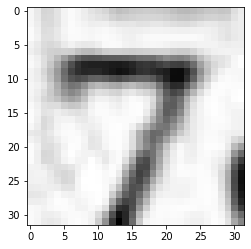

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(f['y_train'][8000]))
plt.imshow(f['X_train'][8000], cmap='gray')

*Image at 8000 index number is an image of number 7*

**Print shape of all datasets**

In [ ]:
print(f['X_train'].shape)
print(f['y_train'].shape)
print(f['X_test'].shape)
print(f['y_test'].shape)
print(f['X_val'].shape)
print(f['y_val'].shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


X_val contains highest number of images i.e. 60,000, with their corresponding labels in y_val.   
Training model on dataset containing most of the images would not be a bad idea. So in next step, we are going save X_val as x_train and X_train as x_val.   
We will train our model on x_train (originally X_val) and validate on x_val (originally X_train) and finally be tested on untouched dataset i.e. x_test (X_test)

#Data Pre-processing

**Reshape dataset:**   
Reshaping dataset into 32, 32, 1 where 1 represents grayscale channel.

In [ ]:
x_train = f['X_val'].value.reshape(f['X_val'].shape[0], 32, 32,1)
x_val = f['X_train'].value.reshape(f['X_train'].shape[0], 32, 32,1)
x_test = f['X_test'].value.reshape(f['X_test'].shape[0], 32, 32,1)

In [ ]:
y_train = f['y_val']
y_val = f['y_train']
y_test = f['y_test']

In [ ]:
x_train.shape

(60000, 32, 32, 1)

**Normalize dataset:**   
Colour of a grayscale image is represented on scale of 0 to 255. So division by 255 will normailize in such a way that 0 reperesnt 0 and 1 represent 255.

In [ ]:
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
print("x_train shape:", x_train.shape)
print("Images in x_train:", x_train.shape[0])
print("Images in x_test:", x_test.shape[0])
print("Max value in x_train:", x_test.max())
print("Min value in x_train:", x_test.min())
print("Max value in x_test:", x_test.max())
print("Min value in x_test:", x_test.min())

x_train shape: (60000, 32, 32, 1)
Images in x_train: 60000
Images in x_test: 18000
Max value in x_train: 0.9999
Min value in x_train: 0.0
Max value in x_test: 0.9999
Min value in x_test: 0.0


**Change y labels to categorical**

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#Build Image classifier

**Call important labraries from tensorflow**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

**Model 1:**   
Build a model with single hidden layer containing 125 neurons, batch size = 32 and epochs = 50

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1875/1875 [==============================] - 9s 3ms/step - loss: 2.2968 - accuracy: 0.1368 - val_loss: 2.1648 - val_accuracy: 0.2732
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0834 - accuracy: 0.3465 - val_loss: 1.8291 - val_accuracy: 0.4596
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7403 - accuracy: 0.5125 - val_loss: 1.5181 - val_accuracy: 0.5959
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4781 - accuracy: 0.5953 - val_loss: 1.3381 - val_accuracy: 0.6307
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2943 - accuracy: 0.6401 - val_loss: 1.2067 - val_accuracy: 0.6677
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1920 - accuracy: 0.6640 - val_loss: 1.1404 - val_accuracy: 0.6753
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1258 - accuracy: 0.6769 - val_loss: 1.0815 - val_accuracy:

*Loss on validation set converged to 0.53 in 50 epochs, gave accuracy of 84%*

**Model 2:**   
Increase hidden layers from 1 to 3 with 128 neurons each. Set epochs = 100.

In [ ]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(10, activation="softmax"))

# Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model1.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2842 - accuracy: 0.1426 - val_loss: 2.0725 - val_accuracy: 0.3021
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9130 - accuracy: 0.3633 - val_loss: 1.5526 - val_accuracy: 0.4868
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4603 - accuracy: 0.5302 - val_loss: 1.2409 - val_accuracy: 0.6120
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2277 - accuracy: 0.6119 - val_loss: 1.1336 - val_accuracy: 0.6452
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1150 - accuracy: 0.6518 - val_loss: 1.0000 - val_accuracy: 0.6950
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0357 - accuracy: 0.6800 - val_loss: 0.9705 - val_accuracy: 0.6970
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9748 - accuracy: 0.6981 - val_loss: 0.8925 - val_ac

*Accuracy increase to 91% from 84% previously*

**Model 3:**   
Increase number of neurons to 256 from 128 keeping number of hidden layers unchanged to 3.

In [ ]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(256, activation="relu"))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(10, activation="softmax"))

# Compile the model
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model2.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2867 - accuracy: 0.1441 - val_loss: 2.1567 - val_accuracy: 0.2550
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9818 - accuracy: 0.3627 - val_loss: 1.4888 - val_accuracy: 0.5354
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4260 - accuracy: 0.5524 - val_loss: 1.3861 - val_accuracy: 0.5475
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1855 - accuracy: 0.6306 - val_loss: 1.0648 - val_accuracy: 0.6688
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0523 - accuracy: 0.6729 - val_loss: 0.9397 - val_accuracy: 0.7145
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9756 - accuracy: 0.6988 - val_loss: 0.9238 - val_accuracy: 0.7103
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9082 - accuracy: 0.7205 - val_loss: 0.9463 - val_ac

*Loss reduced to 0.14 and accuracy increase to 95%*

**Model 4:**   
Increase number of layers to 4 with 256 neurons each.


In [ ]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(256, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(10, activation="softmax"))

# Compile the model
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_3 = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2816 - accuracy: 0.1461 - val_loss: 2.0468 - val_accuracy: 0.3100
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8754 - accuracy: 0.3567 - val_loss: 1.4641 - val_accuracy: 0.5195
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3897 - accuracy: 0.5476 - val_loss: 1.1610 - val_accuracy: 0.6291
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1709 - accuracy: 0.6272 - val_loss: 1.1356 - val_accuracy: 0.6322
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0404 - accuracy: 0.6749 - val_loss: 0.9384 - val_accuracy: 0.7107
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9561 - accuracy: 0.7013 - val_loss: 0.9687 - val_accuracy: 0.6890
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8806 - accuracy: 0.7258 - val_loss: 0.8621 - val_ac

Increasing complexity of model just by adding hidden layers and increasing neurons in it yields good accuracy of 97% on validation set. One can try different optimizers like Adam, SGD, RMSprop etc with different values for learning rates and kernel optimizers.

In [ ]:
model3.summary()
#!mkdir -p saved_model
#model.save('saved_model/my_model')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
________________________________________________

*Model summary gives details of the input size, output size, hidden layers and neurons in each layer, total trainable and untrainable parameters*   
*Each image of size 32.32 is flattened to 1024 long vector.*    
*Four hidden layers with 256 neurons each*   
*Trainable parameters is (1024)(256)+256 for first hidden layer. Similarily for others*   
*Output size is 10 i.e. integers from 0 to 9*

**Plot loss vs epochs**

<class 'tensorflow.python.keras.callbacks.History'>


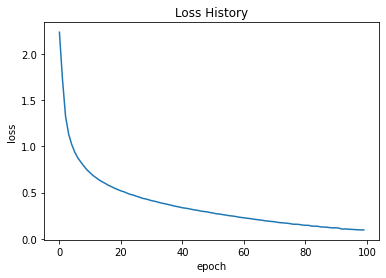

<class 'tensorflow.python.keras.callbacks.History'>


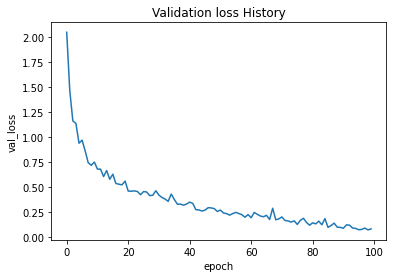

In [ ]:
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

print(type(model_3))
plot_loss(model_3) 

def plot_loss(hist):
  # plot the val_loss
  plt.title('Validation loss History')
  plt.plot(hist.history['val_loss'])
  plt.ylabel('val_loss')
  plt.xlabel('epoch')
  plt.show()

print(type(model_3))
plot_loss(model_3) 

Training as well as validation loss continues to reduce till 100th epoch though reduction starts flatten around 80th epoch 

**Plot Accuracy vs Epochs**

<class 'tensorflow.python.keras.callbacks.History'>


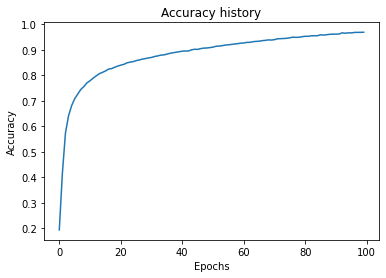

<class 'tensorflow.python.keras.callbacks.History'>


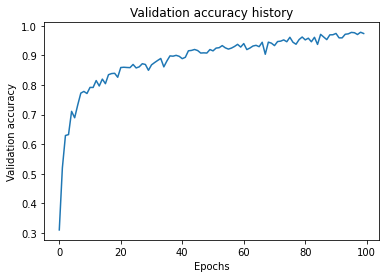

In [ ]:
def plot_loss(hist):
  # plot the accuracy
  plt.title('Accuracy history')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.show()

print(type(model_3))
plot_loss(model_3)

def plot_loss(hist):
  # plot the val_accuracy
  plt.title('Validation accuracy history')
  plt.plot(hist.history['val_accuracy'])
  plt.ylabel('Validation accuracy')
  plt.xlabel('Epochs')
  plt.show()

print(type(model_3))
plot_loss(model_3) 

Training as well as validation accuracy continues to increase till 100th epoch though increment starts flatten around 80th epoch.

#Build a model using Grid SeachCV to obtain best parameters to tune the model 

In [ ]:
def create_model(lr, Lambda):

    ## hyperparameters
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=lr, decay=1e-7, momentum=0.9)
    # Compile model
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="sgd")
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10)

In [ ]:
# define the grid search parameters
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers, optimizers
lr = [1e-5,1e-4,1e-3,1e-2,1e-1]
Lambda = [1e-6,1e-5,1e-4,1e-3,1e-2]

param_grid = dict(lr=lr,Lambda=Lambda)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Due to high time consumption and connectivity problem model did not get trained.